In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('./fire_2019_eng.csv', encoding='cp949')
df

,Date,SiDo,SiGunGu,EupMyeonDong,Type,Source1,Source2,Cause1,Cause2,Start1,Start2,Members,Death,Injury,Moneys,Area1,Area2,Area3
0,2019-01-01 0:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외
1,2019-01-01 0:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택
2,2019-01-01 0:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차
3,2019-01-01 0:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장
4,2019-01-01 1:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,0,0,0,23707,산업시설,공장시설,제재 및 목공업
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",건초,0,0,0,3542,산업시설,동식물시설,기타 동식물시설
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,튀김유,0,0,0,0,"판매,업무시설",일반업무,오피스텔
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,"플라스틱, PVC, 비닐, 장판",0,0,0,105,"판매,업무시설",판매시설,할인점(마트)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40103 entries, 0 to 40102
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          40103 non-null  object
 1   SiDo          40103 non-null  object
 2   SiGunGu       40103 non-null  object
 3   EupMyeonDong  40103 non-null  object
 4   Type          40103 non-null  object
 5   Source1       40103 non-null  object
 6   Source2       40103 non-null  object
 7   Cause1        40103 non-null  object
 8   Cause2        40103 non-null  object
 9   Start1        40103 non-null  object
 10  Start2        40103 non-null  object
 11  Members       40103 non-null  int64 
 12  Death         40103 non-null  int64 
 13  Injury        40103 non-null  int64 
 14  Moneys        40103 non-null  int64 
 15  Area1         40103 non-null  object
 16  Area2         40103 non-null  object
 17  Area3         40103 non-null  object
dtypes: int64(4), object(14)
memory usage: 5.5+ MB


In [20]:
df.shape

(40103, 18)

In [21]:
df.groupby('Cause1')['Cause2'].count()

Cause1
가스누출(폭발)      162
교통사고          433
기계적 요인       4046
기타            452
미상           3778
방화            370
방화의심          435
부주의         20149
자연적인 요인       195
전기적 요인       9459
화학적 요인        624
Name: Cause2, dtype: int64

In [27]:
gb1=df.groupby(['Cause1'])[['Cause2']].count()
gb1

,Cause2
Cause1,
가스누출(폭발),162
교통사고,433
기계적 요인,4046
기타,452
미상,3778
방화,370
방화의심,435
부주의,20149
자연적인 요인,195


In [34]:
gb1 =df[(df['Cause1'] == '가스누출(폭발)')].groupby(by='Cause2')
gb1

In [38]:
gb1_gb=gb1.count()
gb1_gb

,Date,SiDo,SiGunGu,EupMyeonDong,Type,Source1,Source2,Cause1,Start1,Start2,Members,Death,Injury,Moneys,Area1,Area2,Area3
Cause2,,,,,,,,,,,,,,,,,
가스누출(폭발),162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162


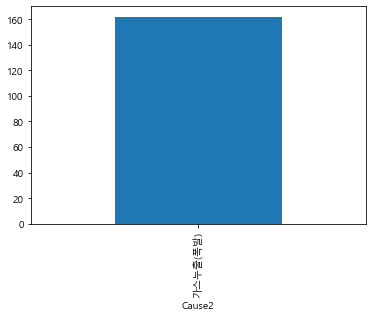

In [36]:
plt.rc('font', family='Malgun Gothic')
gb1_gb['Cause1'].plot(kind='bar')
plt.rcParams["figure.figsize"] = (8,5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40103 entries, 0 to 40102
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          40103 non-null  object
 1   SiDo          40103 non-null  object
 2   SiGunGu       40103 non-null  object
 3   EupMyeonDong  40103 non-null  object
 4   Type          40103 non-null  object
 5   Source1       40103 non-null  object
 6   Source2       40103 non-null  object
 7   Cause1        40103 non-null  object
 8   Cause2        40103 non-null  object
 9   Start1        40103 non-null  object
 10  Start2        40103 non-null  object
 11  Members       40103 non-null  int64 
 12  Death         40103 non-null  int64 
 13  Injury        40103 non-null  int64 
 14  Moneys        40103 non-null  int64 
 15  Area1         40103 non-null  object
 16  Area2         40103 non-null  object
 17  Area3         40103 non-null  object
dtypes: int64(4), object(14)
memory usage: 5.5+ MB
